# Taller N°2: Preprocesamiento de los Datos

# 1. Preparación del dataset

In [ ]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from seaborn import load_dataset

# Enlace de descarga directa
file_id = '1tiQu76UvVDMziFp6WpfxFcr5kgKBVxOW'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el archivo CSV con punto y coma como separador
df_original = pd.read_csv(download_url, sep=';')

# Crear una copia del DataFrame original para trabajar sobre ella
df = df_original.copy()

# Mostrar 10 filas aleatorias
df.sample(20)

Country  Year        Food Category  Total Waste (Tons)  \
1506       Turkey  2022       Meat & Seafood            45621.20   
3500       Canada  2022         Bakery Items            41808.81   
2112      Germany  2022        Prepared Food            18104.97   
987         China  2021            Beverages            28262.79   
2474        India  2018         Bakery Items            37248.64   
630       Germany  2018       Dairy Products            29875.17   
2931  South Korea  2021          Frozen Food            22320.32   
4029  South Korea  2019            Beverages            17963.27   
594           USA  2018     Grains & Cereals            14616.52   
2216      Germany  2019  Fruits & Vegetables            17074.89   
3806    Argentina  2024  Fruits & Vegetables            11161.41   
1075      Germany  2020        Prepared Food            13442.75   
211         Japan  2021     Grains & Cereals             3818.33   
2282       Brazil  2020  Fruits & Vegetables             7711.38   
2618       Turkey  2024        Prepared Food             8866.90   
2586    Indonesia  2022     Grains & Cereals            48773.09   
2387        China  2019         Bakery Items            23737.15   
2685        India  2020        Prepared Food            19900.99   
4716       Turkey  2023        Prepared Food            16263.94   
965     Australia  2019          Frozen Food            24871.75   

      Economic Loss (Million $)  Avg Waste per Capita (Kg)  \
1506                   44279.58                      31.47   
3500                   42236.58                      67.75   
2112                   19402.95                     118.84   
987                    28932.61                     144.48   
2474                   38981.40                     144.28   
630                    26717.15                     152.07   
2931                   20365.11                      55.19   
4029                   20605.61                      22.52   
594                    17039.16                     165.79   
2216                   15502.26                     199.14   
3806                   12094.60                      72.15   
1075                   12803.26                     183.72   
211                     4240.41                      59.44   
2282                    9222.89                      47.53   
2618                    9119.73                     128.34   
2586                   49979.19                     110.86   
2387                   28424.05                      72.28   
2685                   17348.64                      22.72   
4716                   13066.74                     146.14   
965                    25714.31                      76.85   

      Population (Million)  Household Waste (%)  
1506                766.29                68.54  
3500                655.29                45.16  
2112                239.40                43.94  
987                 972.48                65.87  
2474                534.54                55.15  
630                1029.81                60.95  
2931               1067.05                52.08  
4029                315.39                39.22  
594                 283.04                51.55  
2216                380.90                40.80  
3806               1366.98                56.03  
1075                770.14                69.80  
211                  97.08                36.57  
2282                272.77                32.51  
2618                352.17                60.37  
2586                885.95                35.71  
2387                890.56                68.20  
2685                740.68                54.50  
4716                532.68                40.63  
965                 462.89                52.14

In [ ]:
# Mostrar información sobre el tipo de dato de cada columna
df.info()

df.describe()

# Mostrar la cantidad de valores nulos por columna
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB
Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64


Clasificacion de variables:

* Country: Categorica nominal
* Year: cuantitativa discreta
* Food Category: Categorica nominal
* Total Waste: Cuantitativa continua
* Economic Loss: Cuantitativa continua
* Avg Waste per Capita: Cuantitativa continua
* Population: Cuantitativa discreta
* Household Waste: Cuantitativa continua

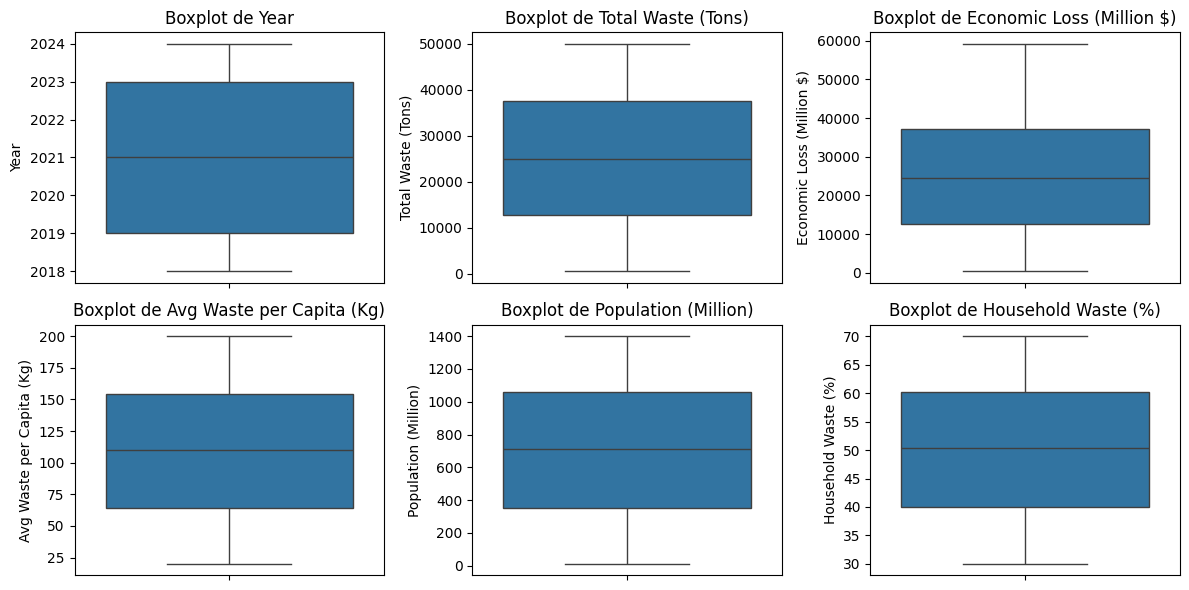

In [ ]:
# Boxplots para detectar outliers en variables cuantitativas
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ["Year", "Total Waste (Tons)", "Economic Loss (Million $)", "Avg Waste per Capita (Kg)", "Population (Million)", "Household Waste (%)"]

plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

# 2. Transformación de variables categóricas a númericas


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from google.colab import files

df = df_original.copy()

# Función para crear columnas binarias para cada categoría
def create_category_columns(column, bins, labels, prefix):
    categories = pd.cut(column, bins=bins, labels=labels, include_lowest=True)
    for label in labels:
        df[f'{prefix}_{label}'] = (categories == label).astype(int)

# -------- Discretización corregida de variables continuas --------
labels = ['Bajo', 'Medio', 'Alto', 'Extremo']

create_category_columns(
    df['Total Waste (Tons)'],
    bins=[0, 12783.73, 24865.22, 37471.03, 49990.76],
    labels=labels,
    prefix='Total Waste'
)

create_category_columns(
    df['Economic Loss (Million $)'],
    bins=[0, 12612.47, 24428.15, 37146.03, 59228.93],
    labels=labels,
    prefix='Economic Loss'
)

create_category_columns(
    df['Avg Waste per Capita (Kg)'],
    bins=[0, 64.05, 110.08, 154.53, 199.97],
    labels=labels,
    prefix='Avg Waste per Capita'
)

create_category_columns(
    df['Household Waste (%)'],
    bins=[0, 40.01, 50.29, 60.13, 70],
    labels=labels,
    prefix='Household Waste'
)

# -------- One Hot Encoding para variables categóricas --------
dummies = pd.get_dummies(df[['Country', 'Food Category']], drop_first=True).astype(int)
df = df.drop(['Country', 'Food Category'], axis=1)
df = pd.concat([df, dummies], axis=1)

# -------- Label Encoding --------
label_encoder = LabelEncoder()

if 'Year' in df.columns:
    df['Year_Label'] = label_encoder.fit_transform(df['Year'])

if 'Population (Million)' in df.columns:
    df['Population_Label'] = label_encoder.fit_transform(df['Population (Million)'])

# -------- Eliminar columnas originales --------
df.drop(columns=[
    'Total Waste (Tons)',
    'Economic Loss (Million $)',
    'Avg Waste per Capita (Kg)',
    'Household Waste (%)',
    'Year',
    'Population (Million)'
], inplace=True)

# Mostrar muestra de verificación
print("\nDataFrame después de todas las transformaciones:")
print(df.head())

# Guardar y descargar
df.to_csv("df_transformed.csv", index=False)
files.download("df_transformed.csv")



DataFrame después de todas las transformaciones:
   Total Waste_Bajo  Total Waste_Medio  Total Waste_Alto  Total Waste_Extremo  \
0                 0                  1                 0                    0   
1                 1                  0                 0                    0   
2                 1                  0                 0                    0   
3                 0                  0                 0                    1   
4                 0                  0                 1                    0   

   Economic Loss_Bajo  Economic Loss_Medio  Economic Loss_Alto  \
0                   0                    1                   0   
1                   1                    0                   0   
2                   1                    0                   0   
3                   0                    0                   0   
4                   0                    0                   1   

   Economic Loss_Extremo  Avg Waste per Capita_Bajo  \
0          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

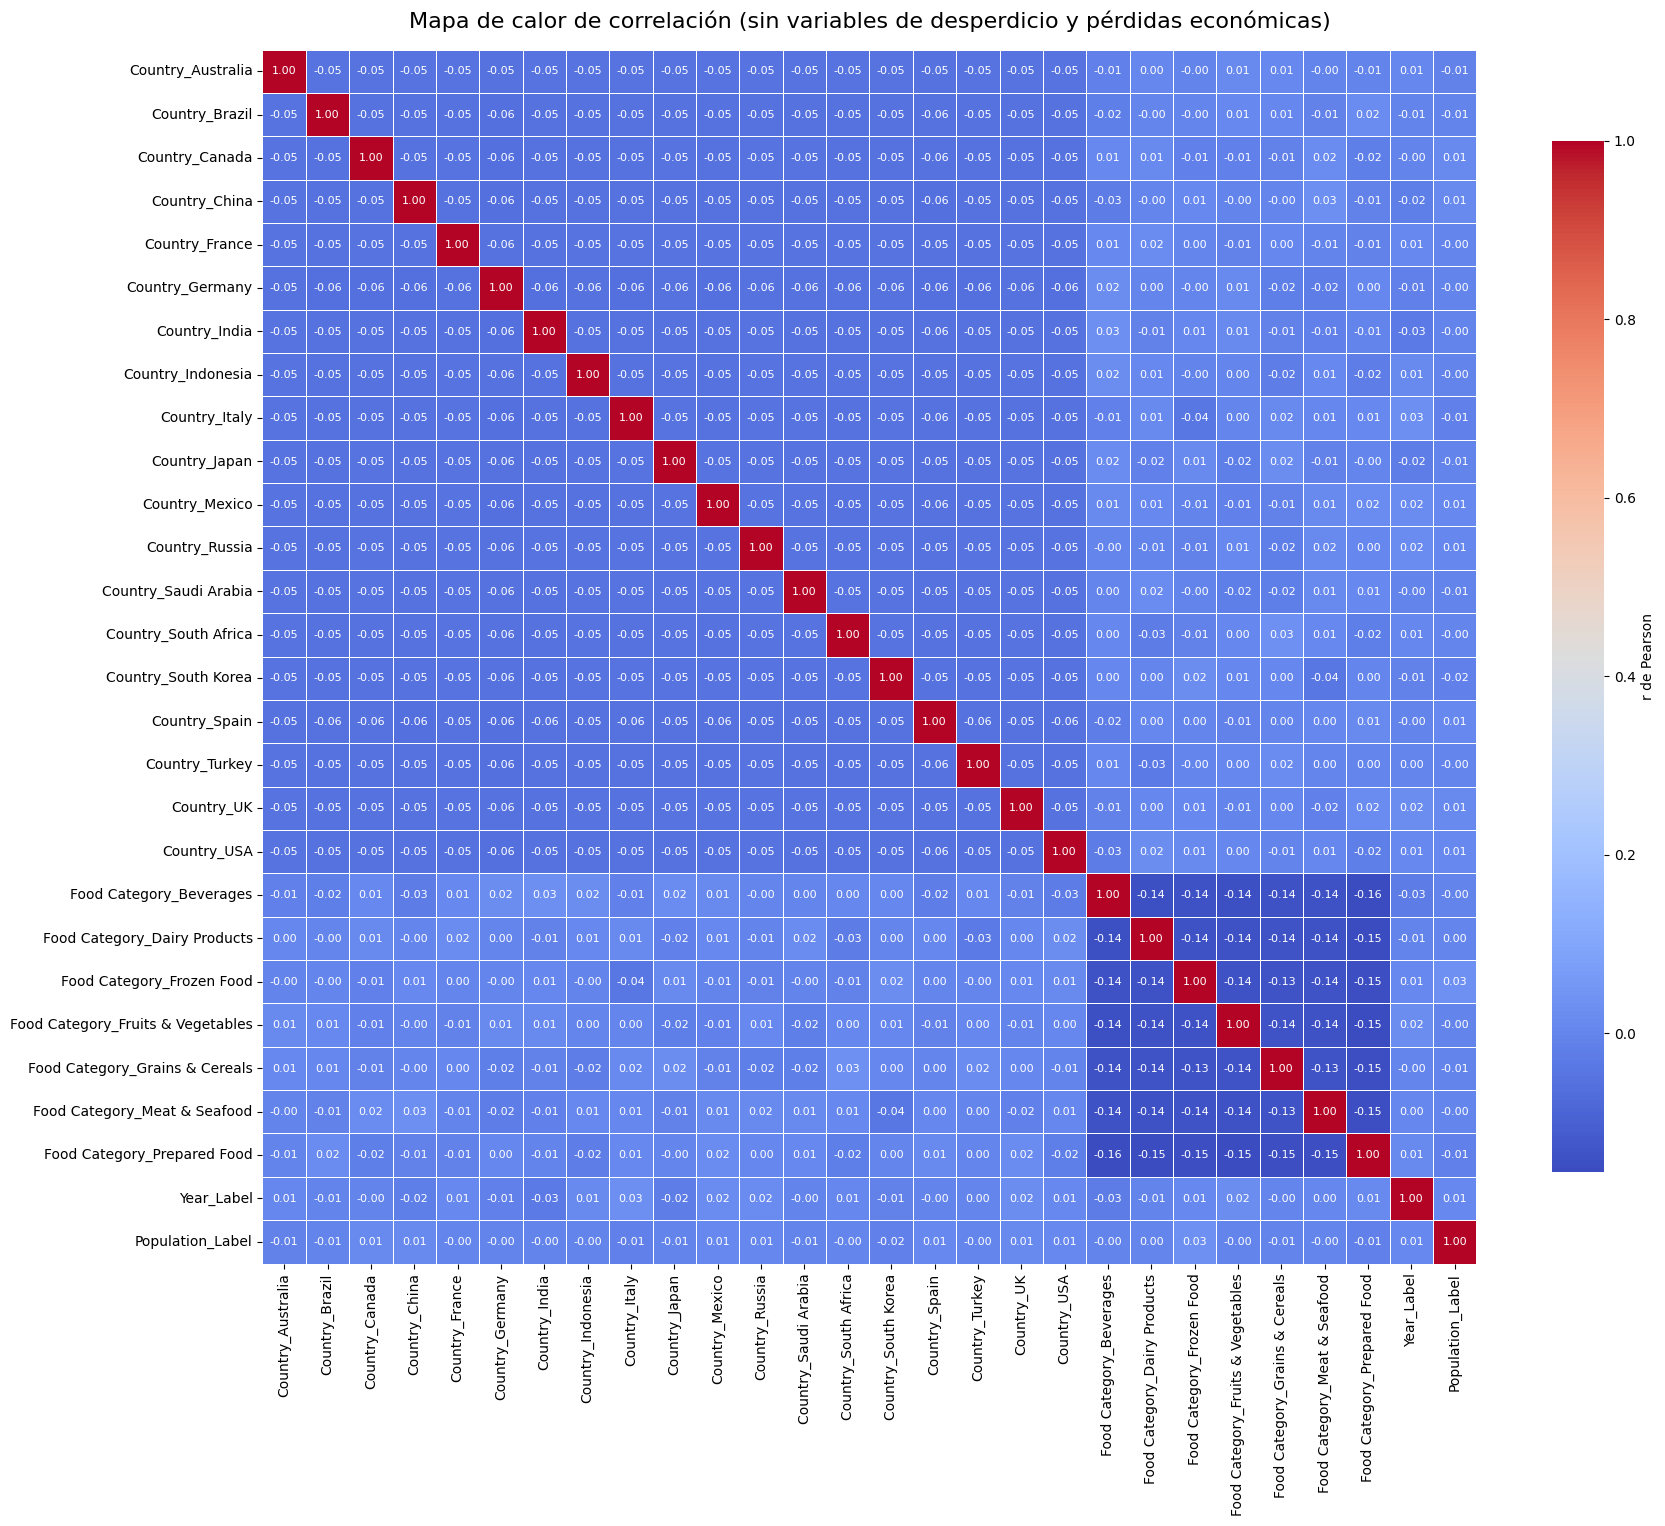

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Excluye columnas con los prefijos indicados
columnas_excluidas = ('Total Waste_', 'Economic Loss_', 'Avg Waste per Capita_', 'Household Waste_')
columnas_filtradas = [col for col in df.columns if not col.startswith(columnas_excluidas)]

# 2. Filtra el DataFrame
df_filtrado = df[columnas_filtradas]

# 3. Calcula la matriz de correlación
correlation_matrix = df_filtrado.corr()

# 4. Prepara la figura
plt.figure(figsize=(18, 16))

# 5. Dibuja el heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75, "label": "r de Pearson"},
    annot_kws={"size": 8}
)

# 6. Ajusta etiquetas y diseño
plt.title("Mapa de calor de correlación (sin variables de desperdicio y pérdidas económicas)", fontsize=16, pad=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

# Taller N°3: Usando el Algoritmo Apriori

In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
from google.colab import files

# Crear copia y preparar datos
df_discretizado = df.copy()

# Seleccionar columnas binarias y convertir a booleanos
df_binary = df_discretizado.select_dtypes(include=[bool, int]).astype(bool)

# Aplicar Apriori
frequent_itemsets = apriori(df_binary, min_support=0.05, use_colnames=True)

# Generar reglas
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Filtrar reglas por soporte, confianza y lift
filtered_rules = rules[
    (rules['support'] >= 0.05) &
    (rules['confidence'] >= 0.7) &
    (rules['lift'] >= 1.0)
]

# Mostrar resultados
print("Frequent Itemsets:")
print(frequent_itemsets.head())

print("\nFiltered Association Rules (Support >= 0.05, Confidence >= 0.7, Lift >= 1.0):")
print(filtered_rules.head())

# Limpieza de datos antes de guardar
if not filtered_rules.empty:
    # Convertir frozenset a string legible
    filtered_rules = filtered_rules.copy()
    filtered_rules['antecedents'] = filtered_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    filtered_rules['consequents'] = filtered_rules['consequents'].apply(lambda x: ', '.join(list(x)))

    # Eliminar columnas sin nombre
    filtered_rules = filtered_rules.loc[:, ~filtered_rules.columns.str.contains('^Unnamed')]

    # Guardar CSV limpio
    filtered_rules.to_csv("association_rules_filtered.csv", index=False)
    files.download("association_rules_filtered.csv")

Frequent Itemsets:
   support               itemsets
0     0.25     (Total Waste_Bajo)
1     0.25    (Total Waste_Medio)
2     0.25     (Total Waste_Alto)
3     0.25  (Total Waste_Extremo)
4     0.25   (Economic Loss_Bajo)

Filtered Association Rules (Support >= 0.05, Confidence >= 0.7, Lift >= 1.0):
             antecedents            consequents  antecedent support  \
0     (Total Waste_Bajo)   (Economic Loss_Bajo)                0.25   
1   (Economic Loss_Bajo)     (Total Waste_Bajo)                0.25   
2     (Total Waste_Bajo)           (Year_Label)                0.25   
4  (Economic Loss_Medio)    (Total Waste_Medio)                0.25   
5    (Total Waste_Medio)  (Economic Loss_Medio)                0.25   

   consequent support  support  confidence      lift  representativity  \
0              0.2500   0.2368      0.9472  3.788800               1.0   
1              0.2500   0.2368      0.9472  3.788800               1.0   
2              0.8584   0.2160      0.8640  1.006

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

    antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
219  Economic Loss_Extremo, Avg Waste per Capita_Ba...                                                                                                                   
455  Economic Loss_Extremo, Avg Waste per Capita_Me...                                                                                                                   
410  Population_Label, Total Waste_Medio,"Year_Labe...                                                                                                                   
231  Economic Loss_Extremo, Household Waste_Extremo...                                                                                                                   
607  Total Waste_Bajo, Population_Label, Avg Waste ...                                                                                                

/tmp/ipython-input-6-558595294.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


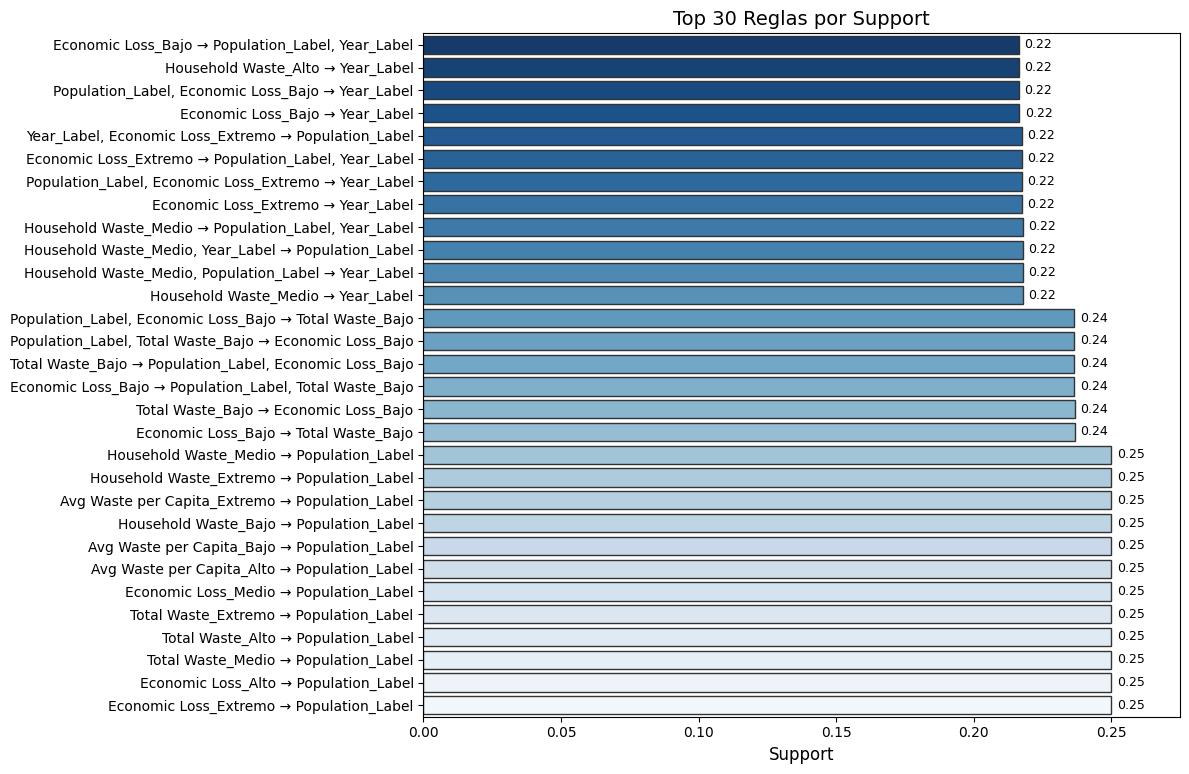

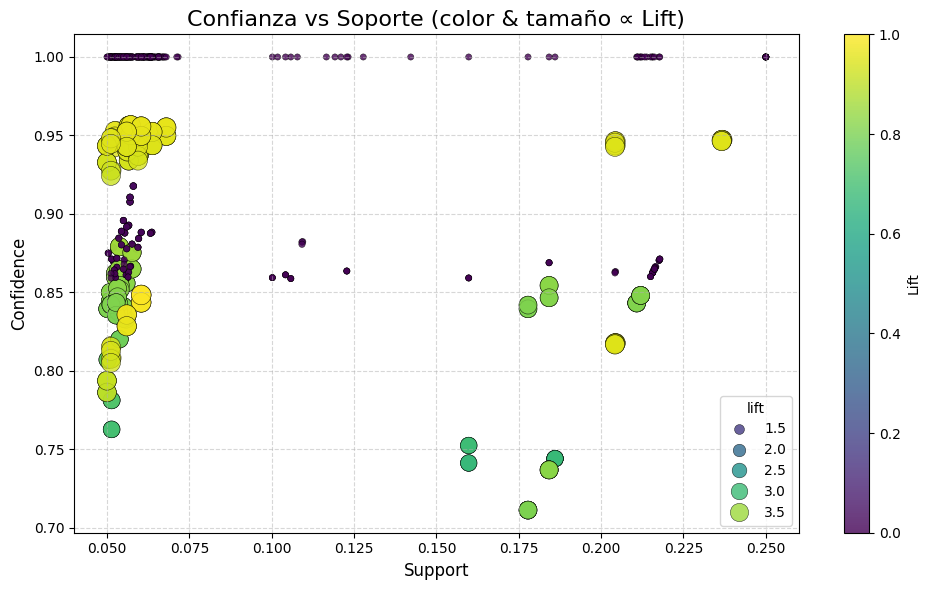

/tmp/ipython-input-6-558595294.py:96: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(


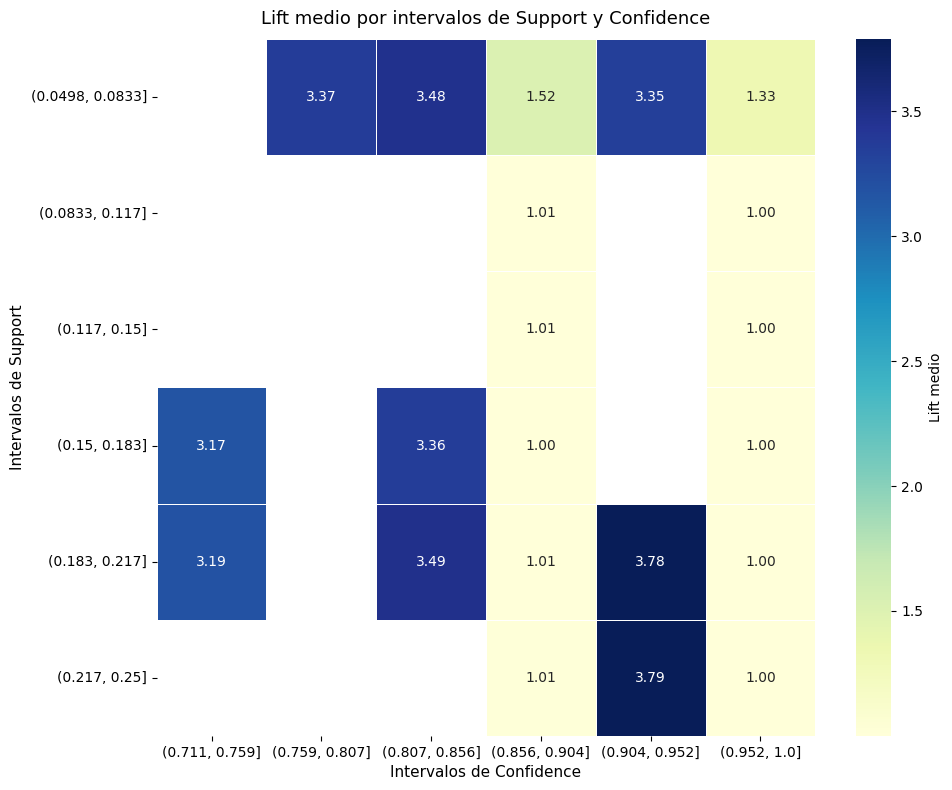

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ----------------------------------------------------------------------------------
# 1. Cargar archivo principal desde Google Drive
# ----------------------------------------------------------------------------------
file_id = '1RtSGiyN8SKxSF3wKsaVIH_DfNISYUBf7'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

df_original = pd.read_csv(download_url, sep=';')
df = df_original.copy()

print(df.sample(10))  # Verificación

# ----------------------------------------------------------------------------------
# 2. Cargar reglas desde CSV filtrado
# ----------------------------------------------------------------------------------
association_rules_df = pd.read_csv("association_rules_filtered.csv")

# Validación si viene vacío
if association_rules_df.empty:
    print("No hay reglas para graficar.")
else:
    # Convertir columnas a texto por si vienen como objetos
    association_rules_df["antecedents"] = association_rules_df["antecedents"].astype(str)
    association_rules_df["consequents"] = association_rules_df["consequents"].astype(str)

    # Crear columna legible sin perder variables
    association_rules_df["itemset_str"] = (
        association_rules_df["antecedents"] + " → " + association_rules_df["consequents"]
    )

    # Mostrar un preview para ver que se ve bien
    print("Reglas listas para graficar:")
    print(association_rules_df[["itemset_str", "support", "confidence", "lift"]].head())

    # ----------------------------------------------------------------------------------
    # 3. BARRAS: Top-N por soporte
    # ----------------------------------------------------------------------------------
    TOP_N = 30
    topN = association_rules_df.nlargest(TOP_N, "support").sort_values("support", ascending=True)

    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=topN,
        x="support",
        y="itemset_str",
        palette="Blues_r",
        edgecolor=".2"
    )
    for i, v in enumerate(topN["support"]):
        plt.text(v + 0.002, i, f"{v:.2f}", va="center", fontsize=9)

    plt.title(f"Top {TOP_N} Reglas por Support", fontsize=14)
    plt.xlabel("Support", fontsize=12)
    plt.ylabel("")
    plt.xlim(0, topN["support"].max() * 1.1)
    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Deja espacio para el título
    plt.show()

    # ----------------------------------------------------------------------------------
    # 4. SCATTER: Soporte vs Confianza (color ∝ lift)
    # ----------------------------------------------------------------------------------
    plt.figure(figsize=(10, 6))
    sc = sns.scatterplot(
        data=association_rules_df,
        x="support",
        y="confidence",
        hue="lift",
        size="lift",
        sizes=(20, 200),
        palette="viridis",
        alpha=0.8,
        edgecolor="k",
        legend="brief"
    )
    plt.colorbar(sc.collections[0], label="Lift")
    plt.title("Confianza vs Soporte (color & tamaño ∝ Lift)", fontsize=16)
    plt.xlabel("Support", fontsize=12)
    plt.ylabel("Confidence", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    # ----------------------------------------------------------------------------------
    # 5. HEATMAP: Lift promedio en bins de soporte × confianza
    # ----------------------------------------------------------------------------------
    n_bins = 6
    association_rules_df["sup_bin"] = pd.cut(association_rules_df["support"], bins=n_bins)
    association_rules_df["conf_bin"] = pd.cut(association_rules_df["confidence"], bins=n_bins)

    heatmap_data = (
        association_rules_df
        .pivot_table(
            index="sup_bin",
            columns="conf_bin",
            values="lift",
            aggfunc="mean"
        )
    )

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        linewidths=0.5,
        cbar_kws={"label": "Lift medio"}
    )
    plt.title("Lift medio por intervalos de Support y Confidence", fontsize=13, pad=11)
    plt.xlabel("Intervalos de Confidence", fontsize=11)
    plt.ylabel("Intervalos de Support", fontsize=11)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

# 1. Cargar el DataFrame transformado
df = pd.read_csv("df_transformed.csv")

# 2. Filtrar columnas binarias (todas las que son 0/1 o booleanas)
df_binary = df.select_dtypes(include=['int', 'bool']).copy()

# 3. Convertir a booleano (obligatorio para Apriori)
df_binary = df_binary.astype(bool)

# 4. Aplicar algoritmo Apriori con soporte mínimo del 5%
frequent_itemsets = apriori(df_binary, min_support=0.05, use_colnames=True)

# 5. Ordenar por soporte descendente
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# 6. Mostrar top 10 itemsets
print("Frequent Itemsets:")
print(frequent_itemsets.head(10))

# 7. Analizar el ítem más frecuente manualmente
# (Esto es lo que permite la interpretación como la del mensaje)





Frequent Itemsets:
     support                                 itemsets
34    0.9998                       (Population_Label)
33    0.8584                             (Year_Label)
175   0.8582           (Year_Label, Population_Label)
78    0.2500  (Total Waste_Extremo, Population_Label)
56    0.2500    (Population_Label, Total Waste_Medio)
108   0.2500   (Economic Loss_Alto, Population_Label)
6     0.2500                     (Economic Loss_Alto)
5     0.2500                    (Economic Loss_Medio)
4     0.2500                     (Economic Loss_Bajo)
3     0.2500                    (Total Waste_Extremo)


# Taller N°4: Usando Modelos Predictivos Lineales

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 1. Cargar datos transformados
df = pd.read_csv("df_transformed.csv")

# 2. Definir variable objetivo
y = df["Total Waste_Extremo"]

# 3. Definir variables predictoras (según tu elección)
X = df[[
    'Economic Loss_Medio',
    'Economic Loss_Alto',
    'Economic Loss_Extremo',
    'Food Category_Beverages',
    'Food Category_Dairy Products',
    'Food Category_Frozen Food',
    'Food Category_Fruits & Vegetables'
]]

# 4. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenar modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 6. Evaluar
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("=== Evaluación del modelo de Regresión Lineal ===")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")

# 7. Ordenar importancia de variables
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values(by='Coeficiente', ascending=False)

print("\n=== Influencia de las Variables (ordenadas) ===")
print(coeficientes)


=== Evaluación del modelo de Regresión Lineal ===
R²: 0.7186
MSE: 0.0552

=== Influencia de las Variables (ordenadas) ===
                            Variable  Coeficiente
2              Economic Loss_Extremo     0.836423
1                 Economic Loss_Alto     0.155969
4       Food Category_Dairy Products     0.015570
3            Food Category_Beverages     0.009563
5          Food Category_Frozen Food     0.007090
0                Economic Loss_Medio    -0.000136
6  Food Category_Fruits & Vegetables    -0.004235
